In [1]:
#| default_exp index

In [2]:
#| hide
#| export
import pandas as pd
import numpy as np
# from cylinder.demand import load_demand
# from cylinder.power import load_power
from cylinder.hwc import HWC
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pathlib import Path

This file will become your README and also the index of your documentation.

## Install

```sh
pip install cylinder
```

This basic model provides the core function for a step change calculation in a mixed hot water cylinder

## How to use

Load some data that can be used to test the model - flow and electricity pricing

In [3]:
# df = (pd.DataFrame(load_demand(path = Path('../data/drawprofiles'),bed=5,unit=4)))
# df.columns=["flow"]
# df = df.merge(load_power(path = Path('../data')), how='left', left_index=True, right_index=True)
# df.head()

Create a hot water cylinder object and initialise it with the data 

In [4]:
hwc = HWC(T_set=70, T_deadband=2, element=3, radius=.2, height=1.5)

In [5]:
print(f'The HWC volume is {int(hwc.volume*1000)} liters')
print(f'The HWC surface area is {hwc.surface_area:.2f} m2')
print(f'The HWC has a {hwc.element:.2f} kW element')


The HWC volume is 188 liters
The HWC surface area is 2.14 m2
The HWC has a 3.00 kW element


Default thermogram 

Run the model for a single day on thermostat and plot the results

In [6]:
hwc = HWC(T_set=55, T_deadband=1.2, element=3, radius=.2, height=1.5)

[1. 1. 1. 1. 1. 1.] [52.71771138 51.92133707 51.12496277 50.32858846 49.53221415 48.73583984]
[1. 1. 1. 1. 1. 1.] [52.70414446 51.91406408 51.11773233 50.32137624 49.524121   48.4736854 ]
[1. 1. 1. 1. 1. 1.] [52.69067224 51.90674781 51.11050181 50.31413753 49.51225551 48.21539847]
[1. 1. 1. 1. 1. 1.] [52.67729266 51.89938986 51.10327033 50.30681709 49.49675778 47.96089472]
[1. 1. 1. 1. 1. 1.] [52.66400372 51.89199178 51.0960362  50.29936298 49.47776316 47.71009208]
[1. 1. 1. 1. 1. 1.] [52.65080346 51.88455505 51.08879705 50.29172637 49.4554025  47.46291061]
[1. 1. 1. 1. 1. 1.] [52.63768996 51.87708104 51.08154982 50.28386144 49.4298022  47.21927253]
[1. 1. 1. 1. 1. 1.] [52.62466138 51.86957104 51.07429088 50.27572523 49.40108445 46.97910209]
[1. 1. 1. 1. 1. 1.] [52.61171589 51.86202626 51.06701604 50.26727748 49.3693673  46.74232551]
[1. 1. 1. 1. 1. 1.] [52.59885175 51.85444778 51.05972062 50.25848056 49.33476486 46.50887097]
[1. 1. 1. 1. 1. 1.] [52.58606721 51.8468366  51.05239951 50.

Text(0.5, 0.98, 'No Heating + Flow rate of 10 litres per minure for 10 minutes')

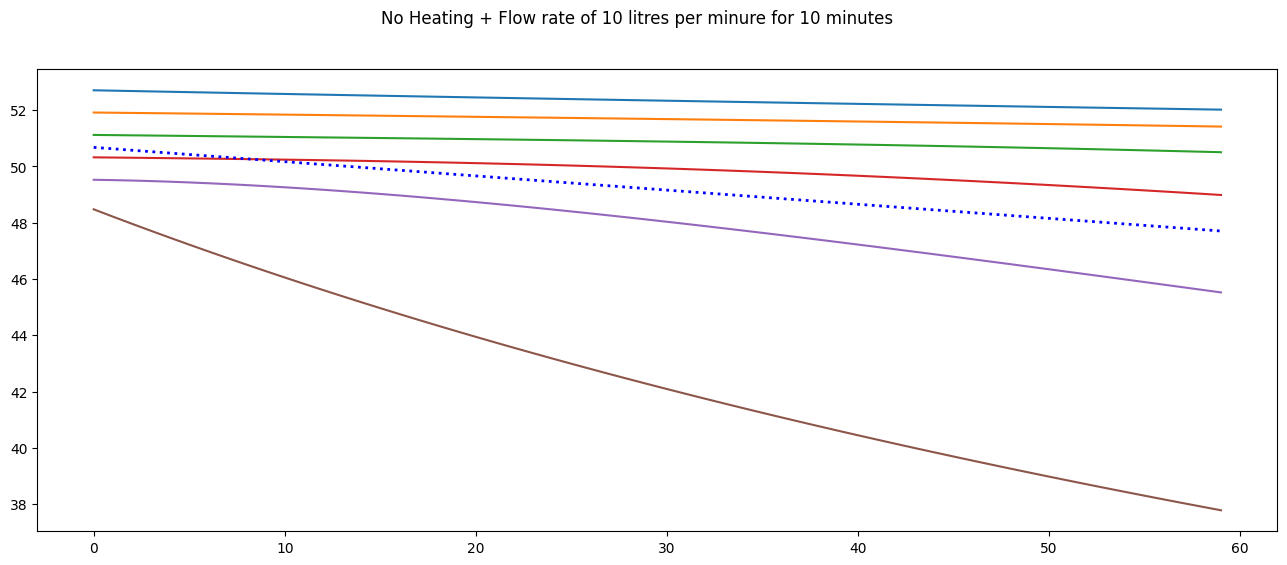

In [7]:
env = HWC(T_set=55, element=3, delta=10000, nodes=6)
shower = .31 # 10 litres per minute
temp = []
for step in range(60):
    action = 0 #np.random.randint(0,2)
    env._update_model(action = action , flow = shower )#if step < 10 else 0)
    temp.append(env.temperatures)

fig, ax = plt.subplots(figsize=(16,6))
ax.plot(np.vstack(temp))
ax.plot(np.vstack(temp).mean(axis=1), lw=2, ls=':', c='blue')

fig.suptitle('No Heating + Flow rate of 10 litres per minure for 10 minutes')

In [8]:
# fig, ax = plt.subplots(nrows=2, figsize=(12,6), sharex=True)
# ax[0].plot(results.temperature)
# # ax[1].plot(results['flow']*100)
# ax[0].set_ylabel('°C')
# ax[0].set_title('Temperature')
# ax[1].plot(results['thermostat'])
# ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
# ax[1].xaxis.set_minor_formatter(mdates.DateFormatter("%H:%M"))

In [9]:
# print(f'The element was on for {results.thermostat.sum()} minutes.')
# print(f'Power consumption was {results.thermostat.sum()/60*hwc.element:.2f} kWh.')

# Passive Cooling